In [ ]:
#  Stacking is an ensemble learning technique that combines multiple models to make predictions. 
# It involves training several base models on the same dataset and then using another model, called a meta-model or blender,
# to combine the predictions of the base models. 
# The goal is to leverage the strengths of different models and improve overall prediction accuracy.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.datasets import make_blobs

# Generate a random dataset with 2 classes
X, y = make_blobs(n_samples=1000000, centers=2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

In [4]:
# Create the meta model 
meta_model = LogisticRegression()

In [6]:
# Initialize an empty array to store base model predictions
base_predictions_train = np.zeros((X_train.shape[0], 3))
print(base_predictions_train)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [15]:
# Perform k-fold cross-validation
kf = KFold(n_splits=5, random_state=33,shuffle=True)

for train_index, val_index in kf.split(X_train):
    train_fold_X, val_fold_X = X_train[train_index], X_train[val_index]
    train_fold_y, val_fold_y = y_train[train_index], y_train[val_index]
    
    model1.fit(train_fold_X, train_fold_y)
    model2.fit(train_fold_X, train_fold_y)
    model3.fit(train_fold_X, train_fold_y)
    
    base_predictions_train[val_index, 0] = model1.predict(val_fold_X)
    base_predictions_train[val_index, 1] = model2.predict(val_fold_X)
    base_predictions_train[val_index, 2] = model3.predict(val_fold_X)

In [16]:
base_predictions_train

array([[1., 1., 1.],
       [0., 0., 0.],
       [1., 1., 1.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
# Now train our meta model
meta_model.fit(base_predictions_train, y_train)


LogisticRegression()

In [20]:
base_predictions_test = np.column_stack((model1.predict(X_test), model2.predict(X_test), model3.predict(X_test)))
final_predictions = meta_model.predict(base_predictions_test)
final_predictions

array([1, 0, 0, ..., 0, 1, 1])

In [21]:
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Calculate accuracy score
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, final_predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Generate classification report
class_report = classification_report(y_test, final_predictions)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[ 99699      0]
 [     0 100301]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99699
           1       1.00      1.00      1.00    100301

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



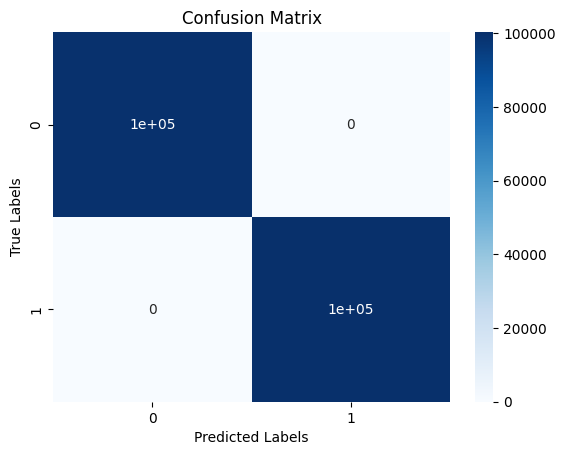

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap for confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
        #                +-------------------+
        #                |                   |
        #   +------------>    Base Models    |
        #   |            |                   |
        #   |            +--------+----------+
        #   |                     |
        #   |           +---------v--------+
        #   |           |                  |
        #   +----------->  Meta-Model       |
        #               |                  |
        #               +------------------+


# In the flow diagram, the base models make predictions on the training data. 
# These predictions are then used as input to train the meta-model. 
# Finally, the meta-model makes predictions on the testing data to generate the final predictions.